In [1]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zeeha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zeeha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Parts of Speech Tagging

In [2]:
# Example text
sample_text = "I shot an elephant in my pajamas"

In [3]:
# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(sample_text))
tagged

[('I', 'PRP'),
 ('shot', 'VBP'),
 ('an', 'DT'),
 ('elephant', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('pajamas', 'NN')]

In [4]:
#Extract all parts of speech from any text
chunker = RegexpParser("""
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
                       P: {<IN>}               #To extract Prepositions
                       V: {<V.*>}              #To extract Verbs
                       PP: {<P> <NP>}          #To extract Prepostional Phrases
                       VP: {<V> <NP|PP>*}      #To extarct Verb Phrases
                       """)

In [5]:
# Print all parts of speech in above sentence
output = chunker.parse(tagged)

In [6]:
# To draw the parse tree
output.draw()

In [7]:
### Another example

In [8]:
sent = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [9]:
sent_pos = nltk.word_tokenize(sent)
sent_pos = nltk.pos_tag(sent_pos)

In [10]:
sent_pos

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

See all the pos tag list here
https://www.guru99.com/pos-tagging-chunking-nltk.html

## Name Entity Recognition (NER)
### SpaCy Library NER

In [11]:
#SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity types:

In [12]:
# CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW, LOC, MONEY, NORP, ORDINAL, ORG, PERCENT, PERSON, PRODUCT, QUANTITY, TIME, WORK_OF_ART

In [13]:
# DATE - Absolute or relative dates or periods
# PERSON - People, including fictional
# GPE - Countries, cities, states
# LOC - Non-GPE locations, mountain ranges, bodies of water
# MONEY - Monetary values, including unit
# TIME - Times smaller than a day
# PRODUCT - Objects, vehicles, foods, etc. (not services)
# CARDINAL - Numerals that do not fall under another type
# ORDINAL - "first", "second", etc.
# QUANTITY - Measurements, as of weight or distance
# EVENT - Named hurricanes, battles, wars, sports events, etc.
# FAC - Buildings, airports, highways, bridges, etc.
# LANGUAGE - Any named language
# LAW - Named documents made into laws.
# NORP - Nationalities or religious or political groups
# PERCENT - Percentage, including "%"
# WORK_OF_ART - Titles of books, songs, etc.

In [14]:
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm')
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [15]:
# IOB SCHEME
# I – Token is inside an entity.
# O – Token is outside an entity.
# B – Token is the beginning of an entity.

In [16]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'), (authorities, 'O', ''), (fined, 'O', ''), (Google, 'B', 'ORG'), (a, 'O', ''), (record, 'O', ''), ($, 'B', 'MONEY'), (5.1, 'I', 'MONEY'), (billion, 'I', 'MONEY'), (on, 'O', ''), (Wednesday, 'B', 'DATE'), (for, 'O', ''), (abusing, 'O', ''), (its, 'O', ''), (power, 'O', ''), (in, 'O', ''), (the, 'O', ''), (mobile, 'O', ''), (phone, 'O', ''), (market, 'O', ''), (and, 'O', ''), (ordered, 'O', ''), (the, 'O', ''), (company, 'O', ''), (to, 'O', ''), (alter, 'O', ''), (its, 'O', ''), (practices, 'O', '')]


### Processing a URL

In [17]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [18]:
# ny_bb = url_to_string('https://www.cnn.com/2023/04/05/politics/trump-hush-money-indictment-bragg/index.html')
# ny_bb = url_to_string('https://www.cnn.com/2023/10/14/sport/india-pakistan-cricket-world-cup-spt-intl/index.html')
ny_bb = url_to_string('https://www.cnn.com/2023/10/25/politics/state-dinner-joe-biden-anthony-albanese/index.html')
article = nlp(ny_bb)
len(article.ents)

278

In [19]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'LOC': 12,
         'PERSON': 57,
         'ORG': 59,
         'NORP': 12,
         'CARDINAL': 11,
         'DATE': 40,
         'GPE': 68,
         'TIME': 7,
         'MONEY': 3,
         'FAC': 2,
         'ORDINAL': 2,
         'EVENT': 1,
         'PRODUCT': 3,
         'WORK_OF_ART': 1})

In [20]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Biden', 22), ('CNN', 21), ('Australia', 9)]

In [21]:
sentences = [x for x in article.sents]
print(sentences[0])

  Crisis in Middle East clouds Biden's agenda as White House hosts Australian PM for lavish state dinner |


In [22]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')

In [23]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])

{'Middle East': 'LOC',
 'Biden': 'PERSON',
 'White House': 'ORG',
 'Australian': 'NORP'}

#### Lemmatization

In [24]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[0])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('  ', 'SPACE', '  '),
 ('Crisis', 'PROPN', 'Crisis'),
 ('Middle', 'PROPN', 'Middle'),
 ('East', 'PROPN', 'East'),
 ('clouds', 'VERB', 'cloud'),
 ('Biden', 'PROPN', 'Biden'),
 ('agenda', 'NOUN', 'agenda'),
 ('White', 'PROPN', 'White'),
 ('House', 'PROPN', 'House'),
 ('hosts', 'NOUN', 'host'),
 ('Australian', 'ADJ', 'australian'),
 ('PM', 'NOUN', 'pm'),
 ('lavish', 'ADJ', 'lavish'),
 ('state', 'NOUN', 'state'),
 ('dinner', 'NOUN', 'dinner'),
 ('|', 'NOUN', '|')]

In [25]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

### PDF Parser - You can use any pdf reader library

In [26]:
from tika import parser # pip install tika

raw = parser.from_file('1708.05148.pdf')
# print(raw['content'])

### Text Summarization

In [27]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)

In [29]:
filtered_word_freq.most_common(20)

[('language', 66),
 ('Language', 54),
 ('text', 51),
 ('information', 44),
 ('Natural', 41),
 ('NLP', 38),
 ('data', 37),
 ('words', 31),
 ('Processing', 30),
 ('processing', 30),
 ('Proceedings', 29),
 ('used', 28),
 ('using', 26),
 ('model', 26),
 ('natural', 24),
 ('word', 24),
 ('Medical', 24),
 ('system', 23),
 ('systems', 23),
 ('Association', 23)]

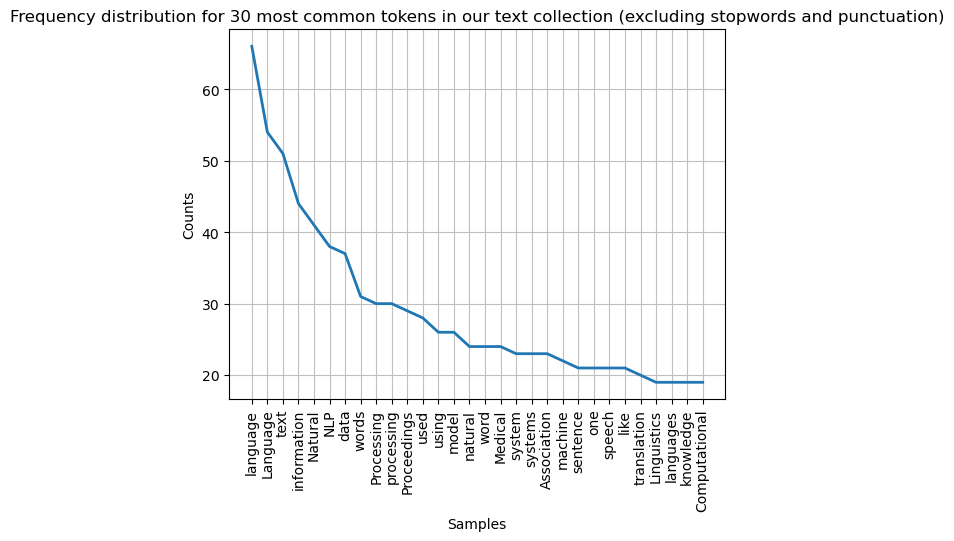

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [30]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

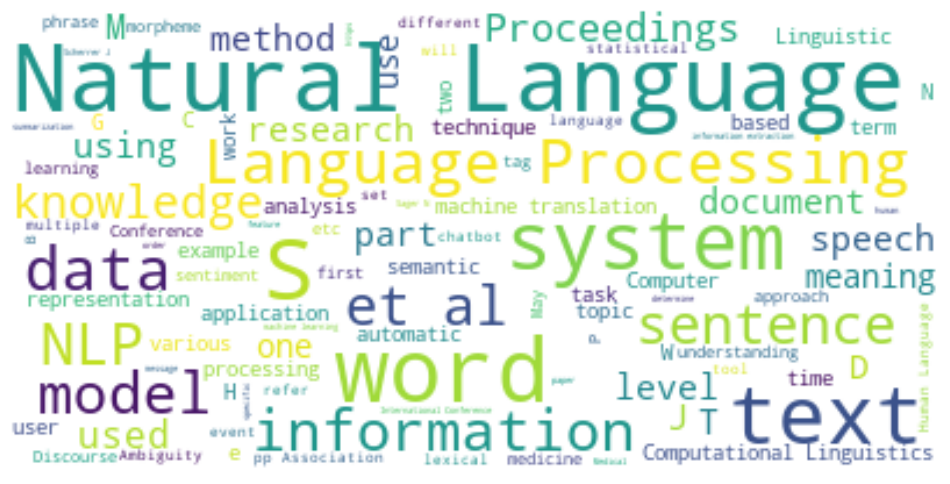

In [33]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

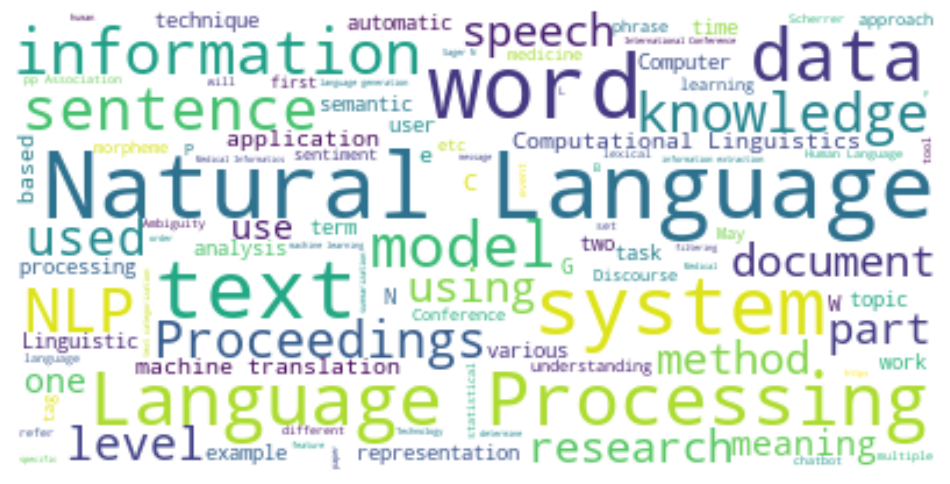

In [34]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### RAKE Library for Text Summarization (Topic Modeling)

In [35]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(78.88505776947558,
  'rennie ., 2000 )[ 46 ][ 47 ][ 48 ], memory based learning'),
 (65.21934709126491,
  'androutsopoulos et al ., 2000b )[ 47 ], support vector machines'),
 (61.88601375793157, 'druker et al ., 1999 )[ 49 ], decision trees'),
 (60.96969696969697, '79 ][ 80 ][ 81 ][ 82 ][ 83 ].'),
 (60.96969696969697, '74 ][ 75 ][ 76 ][ 77 ][ 78 ].'),
 (52.08839471031252, 'pradipta ranjan ray et al ., 2003 )[ 28'),
 (44.27348484848485,
  'gdpr (" general data protection regulation ") compliance'),
 (43.43030303030303,
  'wide ranging covering usual items like word segmentation'),
 (42.72380952380952, 'informatique et gestion des unités de soins'),
 (41.0257053291536, 'powerful general purpose sentence processors like sri ’')]

### Textacy Library for Text Summarization (Topic Modeling)

In [37]:
import textacy
# from textacy import *
  
#Load a spacy model, which will be used for all further processing. 
en = textacy.load_spacy_lang("en_core_web_sm") 

In [38]:
#convert the text into a spacy document. 
doc = textacy.make_spacy_doc(raw['content'], lang=en) 
  
#Print the keywords using TextRank algorithm, as implemented in Textacy. 
print("Textrank output: \n", textacy.extract.keyterms.textrank(doc, 
                                                             normalize="lemma", 
                                                             topn=5)) 
  
# structured information extraction (textacy.extract)
print("Print all keywords output: \n")
keywords = [kps for kps, weights in 
                            textacy.extract.keyterms.textrank(doc, 
                                                              normalize="lemma")] 
print(keywords) 

# #Print the key words and phrases, using SGRank algorithm, as implemented in Textacy 
# print("SGRank output: \n", [kps for kps, weights in 
#                           textacy.extract.keyterms.sgrank(doc, topn=5)]) 
  
# # structured information extraction (textacy.extract) 
# keywords = [kps for kps, weights in 
#                             textacy.extract.keyterms.sgrank(doc, normalize="lemma")] 

Textrank output: 
 [('natural language information processing', 0.007140267084251959), ('standard natural language processing tool', 0.006234608549333732), ('language independent knowledge representation', 0.005400005569270761), ('new machine translation system', 0.005382421996251448), ('language model', 0.00532894406679283)]
Print all keywords output: 

['natural language information processing', 'standard natural language processing tool', 'language independent knowledge representation', 'new machine translation system', 'language model', 'multi sentence text', 'statistical language processing', 'machine specific language', 'medical language processing', 'semantic use']


### Yake Library for Text Summarization (Topic Modeling)

In [39]:
## conda install -c conda-forge yake
import yake

In [40]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Natural Language', 0.00017630910501789887)
('Language Processing', 0.0002772259012794197)
('Language', 0.0007182928677526841)
('Natural', 0.001946179856619044)
('Computational Linguistics', 0.0022099659030024995)
('Processing', 0.0022969736217534134)
('human language', 0.0027613201712648403)
('NLP', 0.0030647533731460543)
('MEDical Language', 0.003266335063269876)
('text', 0.003319539662316616)
('information', 0.0037779958134697695)
('machine translation', 0.004233514642879942)
('languages', 0.004273842563128471)
('Language Generation', 0.00433294331447329)
('Proceedings', 0.005248844957582534)
('medical', 0.0056968242404649315)
('Aditya Koli', 0.006102524070698211)
('Kiran Khatter', 0.006102524070698211)
('Diksha Khurana', 0.006117805687471494)
('Sukhdev Singh', 0.006117805687471494)


# Sentiment Analysis

In [41]:
# import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

In [42]:
s = TextBlob('CS 457 is the best course throughout my course work')
s.sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [43]:
s = TextBlob('CS 457 is an okay course')
s.sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [44]:
s = TextBlob('CS 457 is the worst course I have ever taken')
s.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

### WordCloud

In [46]:
twittertext = open('twittertext','r')

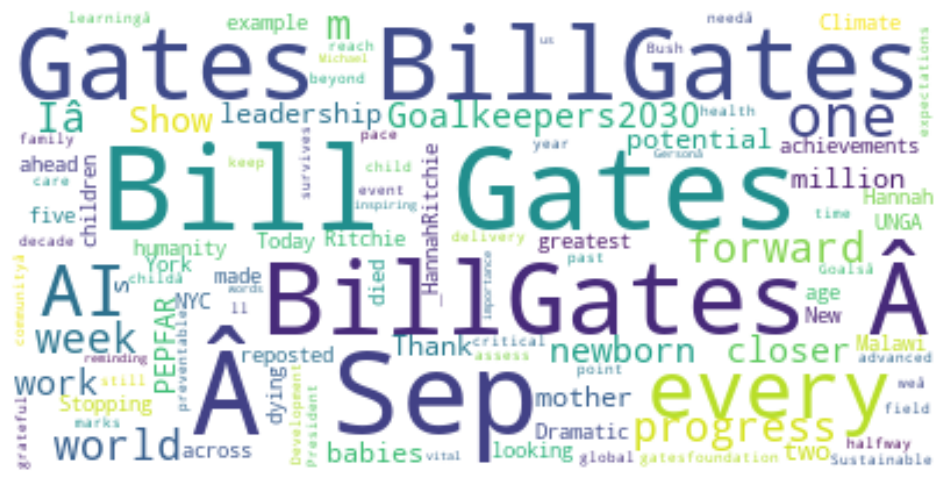

In [47]:
corpus = twittertext.read()
# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["T", "J", "D", "S", "M", "H", "et al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(corpus)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Additional Topic

## Content based Recommendation Engine

In [48]:
resume = pd.read_csv('resume_data.csv')

In [49]:
resume.head()

,id,all_text
0,d49e398551c75ab0a760b2b16168b079,Customer Service/Technical SupportManagement (...
1,c24ced5324c75e4b9016a6e6964f2238,"ManagementManagement (Manager, Director)Result..."
2,610ef1dbdb665c87821770f579c4665d,NaN
3,85b98486df855ba48eeb787d97b9d818,Hotel/Motel/Hospitality/TourismManagement (Man...
4,df4de4596dc05ba5ba7ba885be4f36d5,"Information TechnologyManagement (Manager, Dir..."


In [50]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zeeha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeeha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zeeha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zeeha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

In [52]:
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",str(text))
  text=re.sub("(\\d|\\W)+"," ",str(text))
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [53]:
resume['clean_text'] = resume['all_text'].apply(clean_txt)

In [54]:
resume.head()

,id,all_text,clean_text
0,d49e398551c75ab0a760b2b16168b079,Customer Service/Technical SupportManagement (...,customer service technical supportmanagement m...
1,c24ced5324c75e4b9016a6e6964f2238,"ManagementManagement (Manager, Director)Result...",managementmanagement manager director result d...
2,610ef1dbdb665c87821770f579c4665d,NaN,nan
3,85b98486df855ba48eeb787d97b9d818,Hotel/Motel/Hospitality/TourismManagement (Man...,hotel motel hospitality tourismmanagement mana...
4,df4de4596dc05ba5ba7ba885be4f36d5,"Information TechnologyManagement (Manager, Dir...",information technologymanagement manager direc...


In [56]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((resume['clean_text'])) #fitting and transforming the vector
tfidf_jobid

<7850x94999 sparse matrix of type '<class 'numpy.float64'>'
	with 1557794 stored elements in Compressed Sparse Row format>

In [57]:
resume.shape

(7850, 3)

In [67]:
query = resume.iloc[[50]]

In [68]:
query

,id,all_text,clean_text
50,51dd0397358b58e7b1e5b00c38790ffa,Information TechnologyExperienced with over 2 ...,information technologyexperienced years experi...


In [69]:
from sklearn.metrics.pairwise import cosine_similarity
user_tfidf = tfidf_vectorizer.transform(query['clean_text'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

![TFIDF](tfidf.png) 

In [70]:
output2 = list(cos_similarity_tfidf)

In [71]:
def get_recommendation(top, resume, scores):
  recommendation = pd.DataFrame(columns = ['id', 'clean_text', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'id'] = resume['id'][i]
      recommendation.at[count, 'clean_text'] = resume['clean_text'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

In [72]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
results = get_recommendation(top,resume, list_scores)

In [73]:
results

,id,clean_text,score
0,51dd0397358b58e7b1e5b00c38790ffa,information technologyexperienced years experi...,1.0
1,24ad9380258157a781cbf405070146cf,managementmanagement manager director experien...,0.292264
2,3678e779d1a950ad80df2f73c2aa389a,healthcaremanagement manager director general ...,0.285811
3,73912116cbc55b2c8135187cb0d96fa4,managementexperienced years experiencedynamic ...,0.280041
4,a978d7f0328b59c1a64b6b75680cf9d1,managementmanagement manager director dynamic ...,0.269427
5,c3ab492a5a185fe5b392e3dcd77a4f96,executivemanagement manager director highly mo...,0.267883
6,61d40efa5cf3551abd184408becb97f5,information technologyexperienced years experi...,0.267592
7,701979a593f6592c9aa8718f75f73e73,finance investmentmanagement manager director ...,0.260531
8,75df5c3f2132571b9aac7ad6974b916b,finance investmentmanagement manager director ...,0.260531
9,972108552ad358cd934f51f204669d08,finance investmentmanagement manager director ...,0.260531
